## 一、真实函数
$$
f(x)=2e^{-x}sinx
$$

## 二、采样数据
从真实函数中采样数据，并且添加噪声，噪声服从正态分布$\epsilon \sim N(0, \sigma^2)$

$$
g(x) = 2e^{-x}sinx + \epsilon \sim N(0, \sigma^2)
$$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures #多项式特征交互
from sklearn.linear_model import LinearRegression #线性回归模型
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [2]:
def true_fun(x):
    #真实函数
    return 2*np.exp(-x)*np.sin(x)

In [3]:
def data_samples():
    #从真实函数采样数据，并且添加噪声，模拟真实数据
    np.random.seed(0) #随机种子
    n_samples = 30 #样本量
    X = np.sort(np.random.rand(n_samples)*6) #[0,6]之间均匀分布采样
#    X = a + np.random.rand(n_samples)*(b-a)  a到b之间
    y = true_fun(X)+np.random.random(n_samples)*0.05 #添加噪声
    return X,y

In [4]:
def model_train(X,y):
    #模型训练和测试，采用多项式回归，最高阶次（1，3，5，15）
    degress = [1,3,5,15]
    plt.figure(figsize=(20,4))
    for i in range(len(degress)):
        plt.subplot(1,len(degress),i+1)
        polynomial_features = PolynomialFeatures(degress[i],include_bias=False) #多项式数据特征预处理
        linear_regression = LinearRegression() #线性回归模型
        pipline = Pipeline([('polynomial_features',polynomial_features),('linear_regression',linear_regression)])
        pipline.fit(X[:,np.newaxis],y)
        scores = cross_val_score(pipline,X[:,np.newaxis],y,scoring='neg_mean_squared_error',cv=10)
        print(scores)
        #绘制图像
        X_test = np.linspace(0,6,100)
        plt.plot(X_test,pipline.predict(X_test[:,np.newaxis]),label = 'Model')
        plt.plot(X_test,true_fun(X_test),label = 'Ture Function')
        plt.scatter(X,y,label = 'Samples')
        plt.legend(loc='best',fontsize=12)
        plt.xlabel('X',fontsize=12)
        plt.ylabel('Y',fontsize=12)
        plt.grid()
        plt.title('degress{}\nMSE={:.2}(+/-{:.2})'.format(degress[i],-scores.mean(),scores.std()),fontsize = 14)
plt.show()

In [42]:
polynomial_features = PolynomialFeatures(3,include_bias=False)

In [43]:
X = np.arange(9).reshape(3,3)
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [44]:
polynomial_features.fit_transform(X)

array([[  0.,   1.,   2.,   0.,   0.,   0.,   1.,   2.,   4.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   2.,   4.,   8.],
       [  3.,   4.,   5.,   9.,  12.,  15.,  16.,  20.,  25.,  27.,  36.,
         45.,  48.,  60.,  75.,  64.,  80., 100., 125.],
       [  6.,   7.,   8.,  36.,  42.,  48.,  49.,  56.,  64., 216., 252.,
        288., 294., 336., 384., 343., 392., 448., 512.]])

[-0.04260323 -0.08541145 -0.0097235  -0.01911492 -0.0186257  -0.01192093
 -0.00080808 -0.00125855 -0.01123741 -0.02924979]
[-2.46155329e-01 -4.72759932e-02 -4.94863604e-03 -4.15099375e-03
 -1.95578396e-03 -3.68443512e-06 -5.54707706e-03 -7.00889450e-03
 -3.65268543e-04 -3.65982720e-02]
[-5.53336874e-02 -1.55894448e-03 -1.06467190e-04 -4.63216090e-05
 -3.15486654e-04 -2.80912526e-04 -1.63479193e-04 -2.79363004e-04
 -3.29953129e-04 -3.35344610e-03]
[-9.86623454e-01 -2.87421243e-01 -7.55189533e-05 -3.95333069e-05
 -2.28200845e-04 -6.36057166e-05 -1.29259204e-04 -2.92317531e-04
 -2.32414762e-03 -4.47450437e-01]


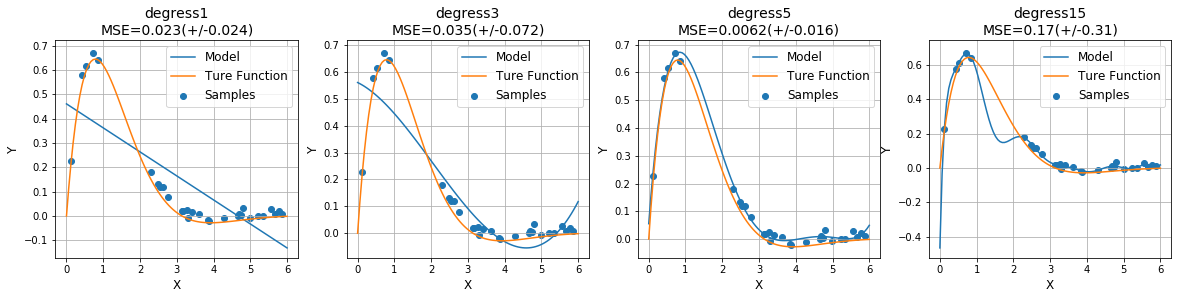

In [5]:
X,y=data_samples()
model_train(X,y)